# Setup

In [1]:
from collections import Counter, defaultdict
from urllib.parse import urlparse

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import project3utils
import project3models
import project3data
from importlib import reload

In [3]:
# reload(project3data)
data = project3data.get_training_data()

In [10]:
corr = data.corr()
# corr['sort_column'] = corr['is_phishing'].apply(abs)
corr['is_phishing'].sort_values(ascending=False)

is_phishing               1.000000
subdomain_empty_string    0.459944
path_entropy              0.456526
path_ends_in_php          0.430043
path_char_slash           0.418328
path_char_p               0.382555
path_char_dot             0.352761
path_consonants           0.298143
path_total_chars          0.292671
path_char_c               0.288831
domain_total_chars        0.282942
path_char_o               0.265365
domain_consonants         0.261201
path_char_n               0.255265
path_vowels               0.254571
path_char_h               0.253617
path_char_m               0.240843
path_char_l               0.238332
domain_char_0             0.233906
path_char_d               0.232072
path_char_x               0.220945
path_char_e               0.215547
domain_digits             0.209961
path_char_f               0.206474
path_char_g               0.201730
domain_entropy            0.199805
path_digits               0.195343
path_char_b               0.178700
path_char_7         

In [26]:
averages = data.groupby(['is_phishing']).mean()
important_feature_columns = [
    'path_empty_string','path_entropy','path_char_slash','path_ends_in_php',
    'https','subdomain_total_chars','subdomain_empty_string','subdomain_entropy',
    'domain_total_chars'
]
averages[important_feature_columns]

,path_empty_string,path_entropy,path_char_slash,path_ends_in_php,https,subdomain_total_chars,subdomain_empty_string,subdomain_entropy,domain_total_chars
is_phishing,,,,,,,,,
0,0.40934,1.325141,0.619835,0.012247,0.477248,5.058548,0.119785,0.844584,12.774071
1,0.07160,2.370844,2.075000,0.339400,0.173000,3.568800,0.554500,0.495165,15.571100


# Modeling

============= domain_model =============
Accuracy: 0.91
             precision    recall  f1-score   support

          0       0.91      0.91      0.91      3033
          1       0.91      0.90      0.91      2980

avg / total       0.91      0.91      0.91      6013



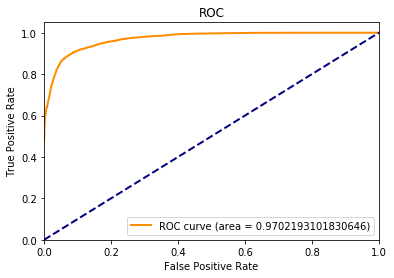

============= path_model =============
Accuracy: 0.9
             precision    recall  f1-score   support

          0       0.89      0.85      0.87      1803
          1       0.91      0.93      0.92      2786

avg / total       0.90      0.90      0.90      4589



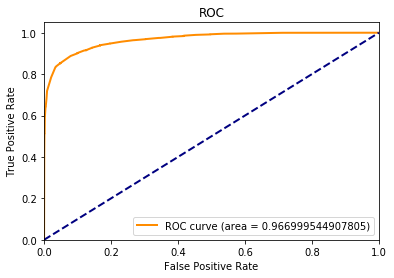

============= model =============
Accuracy: 0.93
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      3033
          1       0.94      0.92      0.93      2980

avg / total       0.93      0.93      0.93      6013



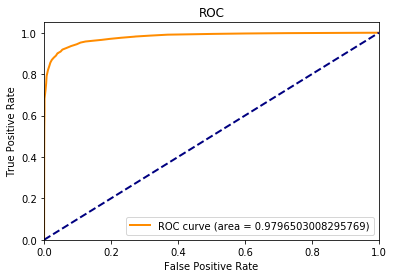

In [4]:
# reload(project3models)
project3models.train_models(data)

In [5]:
models = project3models.get_models()
models

{'domain_model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'path_model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=Non

In [6]:
model = models['model']

In [11]:
def top_n_features(model, columns, n):
    return sorted(list(zip(columns, model.feature_importances_)), reverse=True, key=lambda f: f[1])[0:n]

In [12]:
top_n_features(models['model'], project3utils.numeric_feature_columns, 30)

[('subdomain_empty_string', 0.062861738685588642),
 ('subdomain_total_chars', 0.054574938377944006),
 ('path_char_slash', 0.042573960812207906),
 ('path_ends_in_php', 0.042338487688704428),
 ('subdomain_consonants', 0.038056487870551263),
 ('domain_entropy', 0.032674461179269108),
 ('path_char_dot', 0.026706752010536385),
 ('path_char_hyphen', 0.02551896338837845),
 ('domain_consonants', 0.022412265876197785),
 ('domain_total_chars', 0.022364134441725792),
 ('path_entropy', 0.022175898539532914),
 ('path_char_n', 0.019908264885601986),
 ('path_total_chars', 0.019199112723141325),
 ('domain_digits', 0.018311140465204236),
 ('https', 0.016705437255987585),
 ('path_consonants', 0.016344276597241889),
 ('domain_char_0', 0.015419803189408898),
 ('path_char_p', 0.015125859893113795),
 ('path_empty_string', 0.014955830007856189),
 ('path_char_d', 0.014124514432737736),
 ('subdomain_entropy', 0.014029408900853992),
 ('path_vowels', 0.013925285004046044),
 ('path_digits', 0.013576717055654133),

In [13]:
top_n_features(models['domain_model'], project3utils.nonpath_feature_columns, 30)

[('subdomain_total_chars', 0.076491641695488874),
 ('subdomain_empty_string', 0.076115848073848885),
 ('domain_entropy', 0.06246035542684613),
 ('domain_consonants', 0.045239223473555829),
 ('domain_total_chars', 0.044764290995093256),
 ('https', 0.034665889641573161),
 ('domain_vowels', 0.032502684115317468),
 ('domain_char_o', 0.030051429781188025),
 ('subdomain_entropy', 0.026885556412130522),
 ('domain_char_p', 0.026829028521953957),
 ('domain_char_e', 0.024578616199725397),
 ('subdomain_consonants', 0.024016145462934891),
 ('domain_char_n', 0.021726275317731102),
 ('domain_char_a', 0.020914041560796164),
 ('domain_char_g', 0.020060380371367859),
 ('domain_digits', 0.019751134184161859),
 ('domain_char_c', 0.019480720316531988),
 ('domain_char_s', 0.01893530116841367),
 ('domain_char_i', 0.018818807730085183),
 ('domain_char_r', 0.018235874117967343),
 ('domain_char_t', 0.017414576474623064),
 ('subdomain_vowels', 0.017163636266837232),
 ('domain_char_l', 0.016865388469793696),
 ('

In [14]:
top_n_features(models['path_model'], project3utils.path_feature_columns, 30)

[('path_char_hyphen', 0.079353681331866877),
 ('path_char_slash', 0.076555695982372191),
 ('path_ends_in_php', 0.060231022336094481),
 ('path_entropy', 0.054025826248680825),
 ('path_consonants', 0.047825862858248205),
 ('path_total_chars', 0.044236244560895754),
 ('path_char_k', 0.035861388174513585),
 ('path_char_i', 0.035184442423745112),
 ('path_char_p', 0.034564303525987328),
 ('path_char_dot', 0.033872247230338361),
 ('path_vowels', 0.032391939622719884),
 ('path_char_s', 0.029409666955800693),
 ('path_digits', 0.027661480467948224),
 ('path_char_w', 0.02488022276197744),
 ('path_char_e', 0.023002786409104463),
 ('path_char_r', 0.022673145713345458),
 ('path_char_d', 0.021709646629753509),
 ('path_char_c', 0.021561734093126849),
 ('path_char_m', 0.021472115077108597),
 ('path_char_t', 0.020268376877004713),
 ('path_char_o', 0.020258606122676014),
 ('path_char_a', 0.020252588230724212),
 ('path_char_n', 0.019592450145251187),
 ('path_char_h', 0.019572068899721361),
 ('path_char_l'